## Compare TS variation in mooring, float, and ecco datasets

In [7]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

### Open datasets

Open ecco datasets (row 150)

In [186]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')
theta_row150.close()
salt_row150.close()

In [187]:
# mask land cells
theta_row150_ocean = theta_row150.THETA.where(salt_row150.SALT>30,drop=True)
salt_row150_ocean = salt_row150.SALT.where(salt_row150.SALT>30,drop=True)

Open float datasets

In [188]:
apex_float_ds = xr.open_dataset('H:/PhD_chap3/data/OMG_Float_Data/melville_apex_float_2020to2022.nc')

Open mooring datasets

In [189]:
file_dir = 'H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_interpolated/'

In [190]:
# open Rink data
rink_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Rink_1D_interpolated_temp_profile.nc")
rink_temp_da_interp.close()
rink_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Rink_1D_interpolated_salt_profile.nc")
rink_salt_da_interp.close()

In [191]:
# open Fisher Islands data
fisher_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Fisher_1D_interpolated_temp_profile.nc")
fisher_temp_da_interp.close()
fisher_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Fisher_1D_interpolated_salt_profile.nc")
fisher_salt_da_interp.close()

In [192]:
# open Kong Oscar data
kongoscar_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_temp_profile.nc")
kongoscar_temp_da_interp.close()
kongoscar_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_salt_profile.nc")
kongoscar_salt_da_interp.close()

In [193]:
# open Sverdrup data
sverdrup_temp_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_temp_profile.nc")
sverdrup_temp_da_interp.close()
sverdrup_salt_da_interp = xr.open_dataset(file_dir + "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_salt_profile.nc")
sverdrup_salt_da_interp.close()

### Compare TS magnitudes

#### Compare data between 220-240 m

The greatest depth we can use across all moorings is 220-240m \
Select those depths and combine mooring data

In [194]:
# 220-240 m

# temperature
rink_temp_220m_da = rink_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
fish_temp_220m_da = fisher_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sver_temp_220m_da = sverdrup_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
kong_temp_220m_da = kongoscar_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

# salinity
rink_salt_220m_da = rink_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
fish_salt_220m_da = fisher_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sver_salt_220m_da = sverdrup_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
kong_salt_220m_da = kongoscar_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

In [195]:
# take mean across sites
mooring_temp_220m_concat = xr.concat([rink_temp_220m_da, fish_temp_220m_da, sver_temp_220m_da, kong_temp_220m_da],dim='time')
mooring_salt_220m_concat = xr.concat([rink_salt_220m_da, fish_salt_220m_da, sver_salt_220m_da, kong_salt_220m_da],dim='time')

Groupby month

I am taking cols=slice(100,150) for the ECCO data to get a transect across the whole trough (to better compare with the float data)

In [204]:
# ecco data
theta_row150_220m_month = theta_row150_ocean.sel(cols=slice(100,150),depth=slice(220,240)).mean(['depth','cols'], skipna=True).groupby('time.month').mean()
salt_row150_220m_month = salt_row150_ocean.sel(cols=slice(100,150),depth=slice(220,240)).mean(['depth','cols'], skipna=True).groupby('time.month').mean()

# float data
apex_float_220m_month = apex_float_ds.rename_dims(date='time').rename(date='time').sel(depth_bins=slice(-240,-220)).mean(dim='depth_bins', skipna=True).groupby('time.month').mean()

# mooring data
mooring_temp_220m_month = mooring_temp_220m_concat.groupby('time.month').mean()
mooring_salt_220m_month = mooring_salt_220m_concat.groupby('time.month').mean()

In [205]:
# reindex order of months for plotting
salt_row150_month_220m = salt_row150_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row150_month_220m = theta_row150_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
apex_float_month_220m = apex_float_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_temp_month_220m = mooring_temp_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_salt_month_220m = mooring_salt_220m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [206]:
# rename index with month name
salt_row150_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row150_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
apex_float_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_temp_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_salt_month_220m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

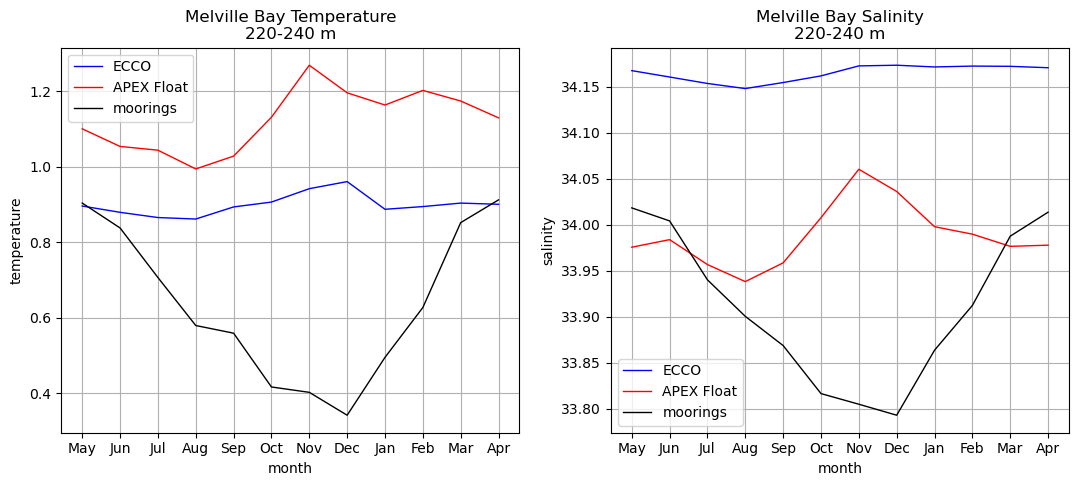

In [238]:
# temperature and salinity at 220-240 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_month_220m.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO')
apex_float_month_220m.temperature.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_month_220m.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
ax1.legend();
ax1.set_title('Melville Bay Temperature\n220-240 m');

salt_row150_month_220m.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO')
apex_float_month_220m.salinity.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_month_220m.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n220-240 m');

#### Compare data between 320-380 m

We do not have observations at these depths for the kong oscar site

In [219]:
depth_range = slice(320,380)

In [228]:
# 320-380 m

# temperature
rink_temp_320m_da = rink_temp_da_interp.temperature.sel(depth=depth_range).mean(dim='depth', skipna=True)
fish_temp_320m_da = fisher_temp_da_interp.temperature.sel(depth=depth_range).mean(dim='depth', skipna=True)
sver_temp_320m_da = sverdrup_temp_da_interp.temperature.sel(depth=depth_range).mean(dim='depth', skipna=True)

# salinity
rink_salt_320m_da = rink_salt_da_interp.salinity.sel(depth=depth_range).mean(dim='depth', skipna=True)
fish_salt_320m_da = fisher_salt_da_interp.salinity.sel(depth=depth_range).mean(dim='depth', skipna=True)
sver_salt_320m_da = sverdrup_salt_da_interp.salinity.sel(depth=depth_range).mean(dim='depth', skipna=True)

In [229]:
# take mean across sites
mooring_temp_320m_concat = xr.concat([rink_temp_320m_da, fish_temp_320m_da, sver_temp_320m_da],dim='time')
mooring_salt_320m_concat = xr.concat([rink_salt_320m_da, fish_salt_320m_da, sver_salt_320m_da],dim='time')

Groupby month

In [230]:
# ecco data
theta_row150_320m_month = theta_row150_ocean.sel(cols=slice(100,150),depth=depth_range).mean(['depth','cols'], skipna=True).groupby('time.month').mean()
salt_row150_320m_month  = salt_row150_ocean.sel(cols=slice(100,150),depth=depth_range).mean(['depth','cols'], skipna=True).groupby('time.month').mean()

# float data
apex_float_320m_month = apex_float_ds.rename_dims(date='time').rename(date='time').sel(depth_bins=slice(-380,-320)).mean(dim='depth_bins', skipna=True).groupby('time.month').mean()

# mooring data
mooring_temp_320m_month = mooring_temp_320m_concat.groupby('time.month').mean()
mooring_salt_320m_month = mooring_salt_320m_concat.groupby('time.month').mean()

In [231]:
# reindex order of months for plotting
salt_row150_month_320m = salt_row150_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row150_month_320m = theta_row150_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
apex_float_month_320m = apex_float_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_temp_month_320m = mooring_temp_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
mooring_salt_month_320m = mooring_salt_320m_month.sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

In [232]:
# rename index with month name
salt_row150_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row150_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
apex_float_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_temp_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
mooring_salt_month_320m['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

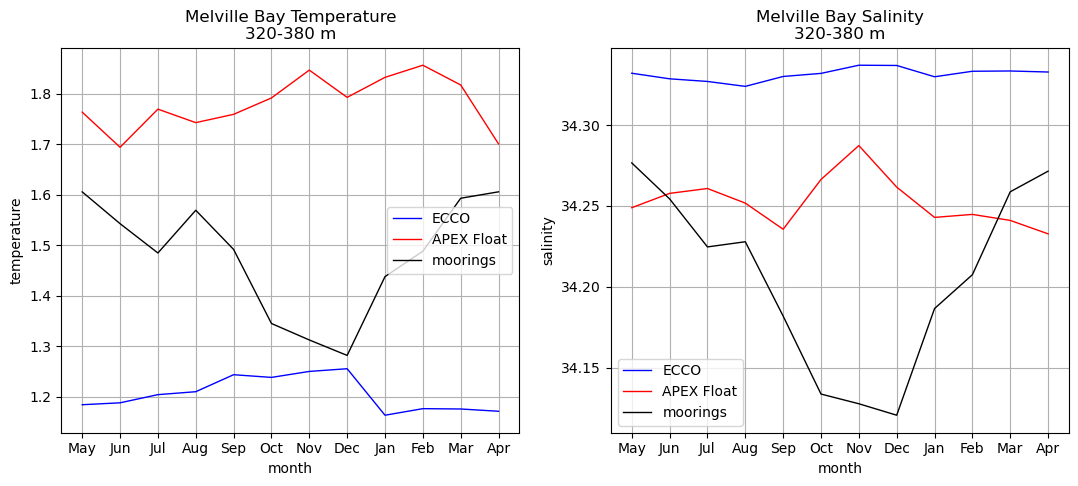

In [235]:
# temperature and salinity at 350-400 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row150_month_320m.plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO')
apex_float_month_320m.temperature.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_temp_month_320m.plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
ax1.legend();
ax1.set_title('Melville Bay Temperature\n320-380 m');

salt_row150_month_320m.plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO')
apex_float_month_320m.salinity.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
mooring_salt_month_320m.plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity\n320-380 m');

### Compare TS seasonal variabiliy - plot anomalies

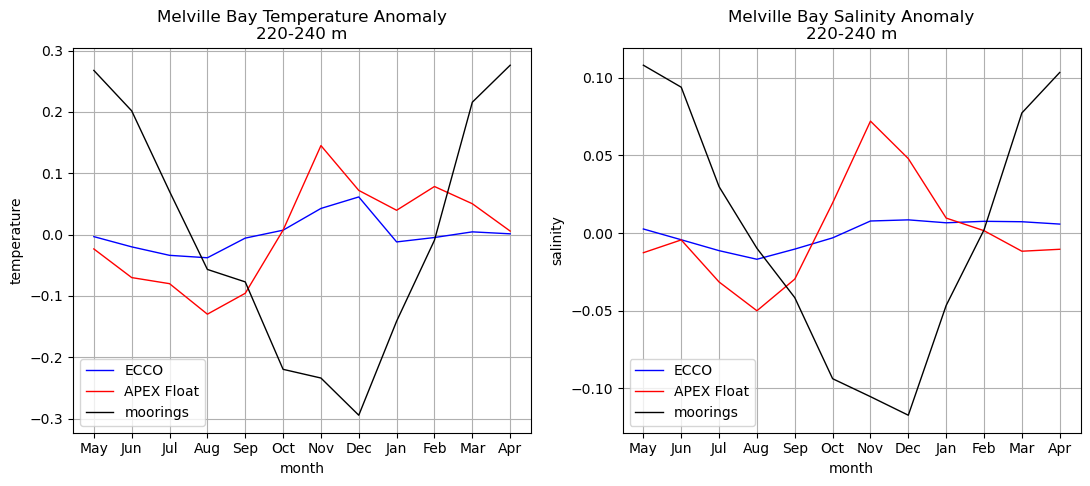

In [236]:
# temperature and salinity at 220-240 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

(theta_row150_month_220m-theta_row150_month_220m.mean()).plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO')
(apex_float_month_220m-apex_float_month_220m.mean()).temperature.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
(mooring_temp_month_220m-mooring_temp_month_220m.mean()).plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
ax1.legend();
ax1.set_title('Melville Bay Temperature Anomaly\n220-240 m');

(salt_row150_month_220m-salt_row150_month_220m.mean()).plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO')
(apex_float_month_220m-apex_float_month_220m.mean()).salinity.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
(mooring_salt_month_220m-mooring_salt_month_220m.mean()).plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity Anomaly\n220-240 m');

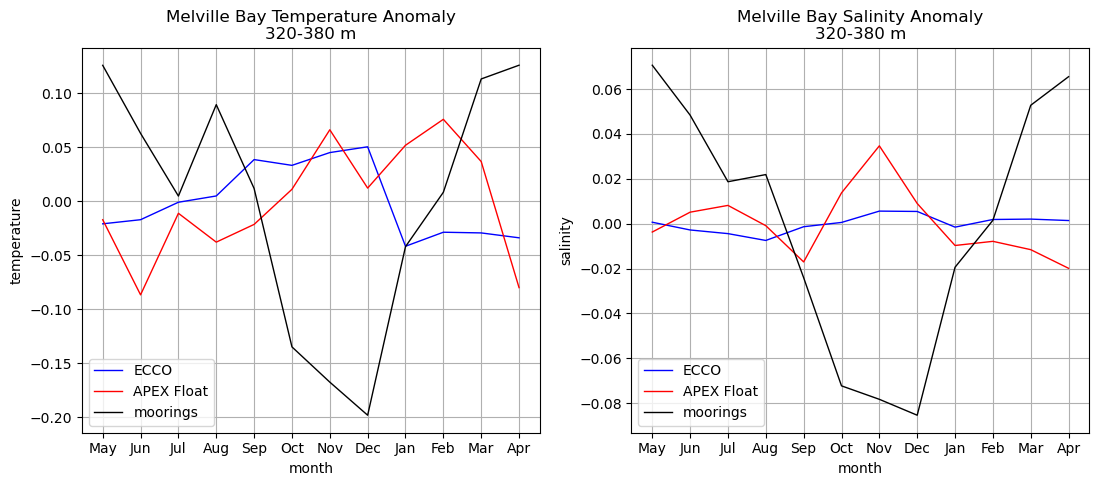

In [237]:
# temperature and salinity at 350-400 m
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

(theta_row150_month_320m-theta_row150_month_320m.mean()).plot(ax=ax1,color='b', linestyle='solid',linewidth=1,label='ECCO')
(apex_float_month_320m-apex_float_month_320m.mean()).temperature.plot(ax=ax1,color='r', linestyle='solid',linewidth=1,label='APEX Float')
(mooring_temp_month_320m-mooring_temp_month_320m.mean()).plot(ax=ax1,color='k', linestyle='solid',linewidth=1,label='moorings')
ax1.grid()
ax1.legend();
ax1.set_title('Melville Bay Temperature Anomaly\n320-380 m');

(salt_row150_month_320m-salt_row150_month_320m.mean()).plot(ax=ax2,color='b', linestyle='solid',linewidth=1,label='ECCO')
(apex_float_month_320m-apex_float_month_320m.mean()).salinity.plot(ax=ax2,color='r', linestyle='solid',linewidth=1,label='APEX Float')
(mooring_salt_month_320m-mooring_salt_month_320m.mean()).plot(ax=ax2,color='k', linestyle='solid',linewidth=1,label='moorings')
ax2.grid()
ax2.legend();
ax2.set_title('Melville Bay Salinity Anomaly\n320-380 m');